In [1]:
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import xarray as xr
import numpy as np

from scipy.interpolate import interp1d

# Custom help functions.
import helpers as hlp

In [2]:
"""
Read LES results.
"""
path = '/home/scratch1/bart/microhh/papers/dust_mahrooz_dirk/v1/high-res/'

# Read column statistics of virtual BSNE.
ds1_les = xr.open_dataset(f'{path}/20220511/valthermond.column.00130.00297.nc')
ds2_les = xr.open_dataset(f'{path}/20220515/valthermond.column.00130.00297.nc')
ds3_les = xr.open_dataset(f'{path}/20220623/valthermond.column.00130.00297.nc')

# Time averages.
ds1_les_m = ds1_les.mean(dim='time')
ds2_les_m = ds2_les.mean(dim='time')
ds3_les_m = ds3_les.mean(dim='time')

# Read default statistics for basestate density.
ds1_les_def = hlp.xr_read_all(f'{path}/20220511/valthermond.default.0025200.nc', ['thermo'])
ds2_les_def = hlp.xr_read_all(f'{path}/20220515/valthermond.default.0000000.nc', ['thermo'])
ds3_les_def = hlp.xr_read_all(f'{path}/20220623/valthermond.default.0000000.nc', ['thermo'])

# Time integrated concentrations at model level 2 (~1 m in this case).
ds1_les_xy = xr.open_dataset(f'{path}/20220511/2-10um.xy.sum.nc')
ds2_les_xy = xr.open_dataset(f'{path}/20220515/2-10um.xy.sum.nc')
ds3_les_xy = xr.open_dataset(f'{path}/20220623/2-10um.xy.sum.nc')

In [3]:
"""
Read data Dirk.
"""

z_obs = np.array([25, 50, 75, 100, 150])

# Data 3 May 2022 - 17 May 2022.
c_obs_1 = np.array([
    [39.8,  33.1, 19.7, 15.8, 12.5],    # 5 um
    [59.6,  53.9, 32.8, 27.7, 21.1],    # 10 um
    [109.3, 82.6, 62.9, 49.0, 37.7],    # 42 um
    [39.5,  20.7, 14.9, 11.0, 8.7]])    # 72 um

# Data 14 June 2022 - 28 June 2022.
c_obs_2 = np.array([
    [4.4, 2.1, 1.5, 1.5, 1.3],          # 5 um
    [7.5, 3.6, 2.6, 2.5, 2.2],          # 10 um
    [8.5, 3.8, 2.8, 2.4, 2.2],          # 42 um
    [2.4, 1.0, 0.6, 0.6, 0.4]])         # 72 um

In [4]:
"""
Interpolate observations to concentrations LES.
Perhaps it is easier to set the LES sizes to the observed ones...?
NOTE: this currently extrapolates for the smallest size in LES, which sounds dangerous...
"""

c_in = np.array([5, 10, 42, 72])
c_out = np.array([1, 6, 15, 39, 70.5])
z_out = z_obs

c_int_1 = np.zeros((c_out.size, z_out.size))
c_int_2 = np.zeros((c_out.size, z_out.size))

for k in range(z_out.size):
    f = interp1d(c_in, c_obs_1[:,k], kind='linear', fill_value='extrapolate')
    c_int_1[:,k] = f(c_out)

    f = interp1d(c_in, c_obs_2[:,k], kind='linear', fill_value='extrapolate')
    c_int_2[:,k] = f(c_out)

Text(0, 0.5, 'z (cm)')

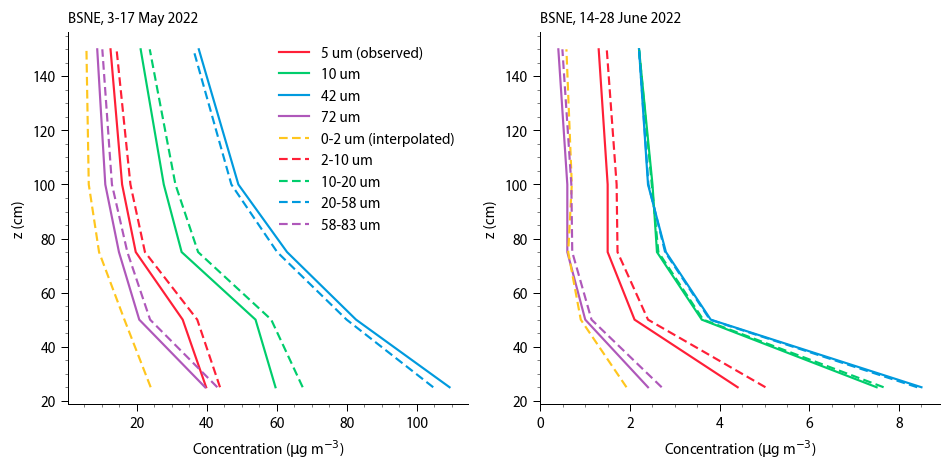

In [5]:
"""
Check: compare observed with interpolated sizes.
"""

pl.figure(figsize=(8,4), layout='tight')
pl.subplot(121)
pl.title('BSNE, 3-17 May 2022', loc='left')
pl.plot(c_obs_1[0], z_obs, color='C0', label='5 um (observed)')
pl.plot(c_obs_1[1], z_obs, color='C1', label='10 um')
pl.plot(c_obs_1[2], z_obs, color='C2', label='42 um')
pl.plot(c_obs_1[3], z_obs, color='C3', label='72 um')

pl.plot(c_int_1[0], z_obs, color='C4', dashes=[4,2], label='0-2 um (interpolated)')
pl.plot(c_int_1[1], z_obs, color='C0', dashes=[4,2], label='2-10 um')
pl.plot(c_int_1[2], z_obs, color='C1', dashes=[4,2], label='10-20 um')
pl.plot(c_int_1[3], z_obs, color='C2', dashes=[4,2], label='20-58 um')
pl.plot(c_int_1[4], z_obs, color='C3', dashes=[4,2], label='58-83 um')

pl.legend()
pl.xlabel(r'Concentration ($\mathrm{\mu}$g m$^{-3}$)')
pl.ylabel('z (cm)')

pl.subplot(122)
pl.title('BSNE, 14-28 June 2022', loc='left')
pl.plot(c_obs_2[0], z_obs, color='C0')
pl.plot(c_obs_2[1], z_obs, color='C1')
pl.plot(c_obs_2[2], z_obs, color='C2')
pl.plot(c_obs_2[3], z_obs, color='C3')

pl.plot(c_int_2[0], z_obs, color='C4', dashes=[4,2])
pl.plot(c_int_2[1], z_obs, color='C0', dashes=[4,2])
pl.plot(c_int_2[2], z_obs, color='C1', dashes=[4,2])
pl.plot(c_int_2[3], z_obs, color='C2', dashes=[4,2])
pl.plot(c_int_2[4], z_obs, color='C3', dashes=[4,2])

pl.xlabel(r'Concentration ($\mathrm{\mu}$g m$^{-3}$)')
pl.ylabel('z (cm)')

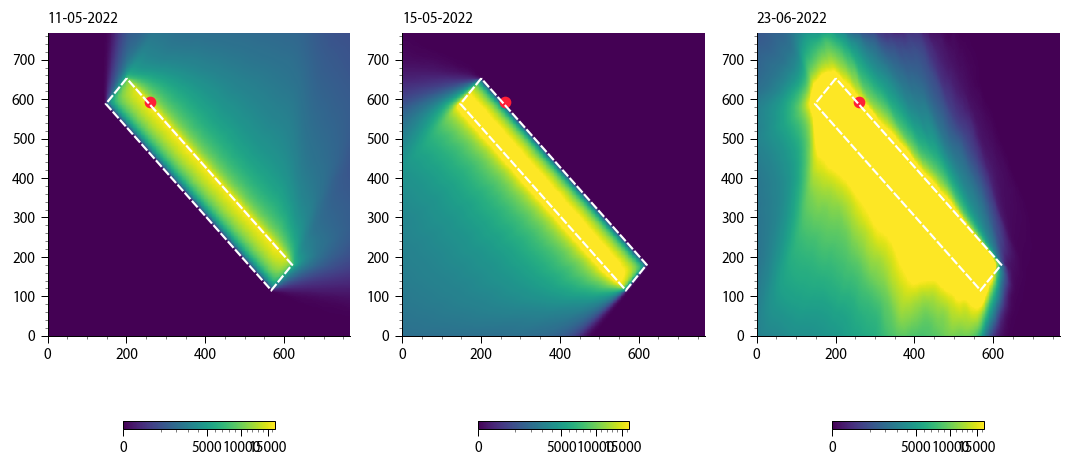

In [9]:
"""
Plot time integrated concentrations at ~1m height, to visualize total spread pattern.
NOTE: colors are not linear and not scaled, so only meant to give an indication of the spatial patterns.
"""
def plot_field_and_bsne():

    x_bsne = 260.04011207
    y_bsne = 594.02613203

    x_field = np.array([200.60855854, 147.96198304, 567.41324966, 620.05453858, 200.60855854])
    y_field = np.array([652.67469053, 587.90528918, 115.27611277, 180.16123885, 652.67469053])

    pl.plot(x_field, y_field, 'w--', label='field')
    pl.scatter(x_bsne, y_bsne, label='BSNE')

norm = colors.PowerNorm(gamma=0.5)
#norm = colors.LogNorm(vmin=1, vmax=15000)

pl.figure(figsize=(9,5), layout='tight')
pl.subplot(131, aspect='equal')
pl.title('11-05-2022', loc='left')
pl.pcolormesh(ds1_les_xy.x, ds1_les_xy.y, ds1_les_xy['2-10um'][0,:,:], norm=norm)
pl.colorbar(orientation='horizontal', shrink=0.5)
plot_field_and_bsne()

pl.subplot(132, aspect='equal')
pl.title('15-05-2022', loc='left')
pl.pcolormesh(ds2_les_xy.x, ds2_les_xy.y, ds2_les_xy['2-10um'][0,:,:], norm=norm)
pl.colorbar(orientation='horizontal', shrink=0.5)
plot_field_and_bsne()

pl.subplot(133, aspect='equal')
pl.title('23-06-2022', loc='left')
pl.pcolormesh(ds3_les_xy.x, ds3_les_xy.y, ds3_les_xy['2-10um'][0,:,:], norm=norm)
pl.colorbar(orientation='horizontal', shrink=0.5)
plot_field_and_bsne()

[Text(0, 0, '0-2 um'),
 Text(1, 0, '2-10 um'),
 Text(2, 0, '10-20 um'),
 Text(3, 0, '20-58 um'),
 Text(4, 0, '58-83 um')]

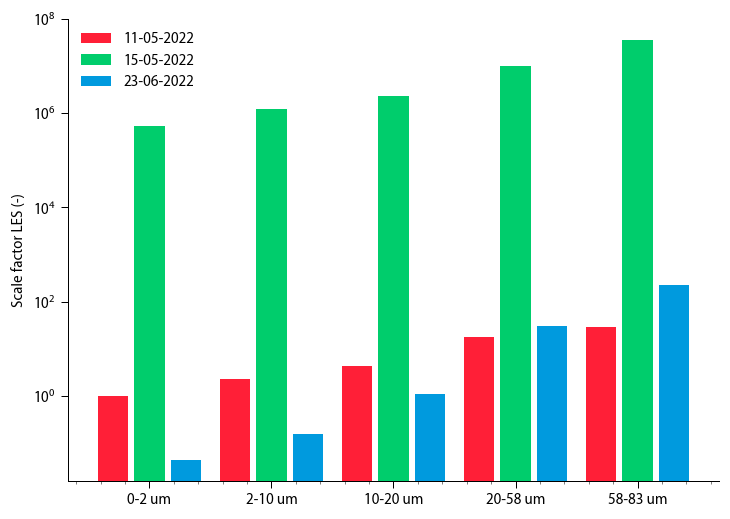

In [10]:
"""
Least squares fit of LES to observed dust concentration.
"""

# Interpolate LES to the observation heights.
ds1m_z = ds1_les_m.interp(z=z_obs/100, zh=z_obs/100)
ds2m_z = ds2_les_m.interp(z=z_obs/100, zh=z_obs/100)
ds3m_z = ds3_les_m.interp(z=z_obs/100, zh=z_obs/100)

rho_d1_z = ds1_les_def.rhoref.interp(z=z_obs/100)
rho_d2_z = ds2_les_def.rhoref.interp(z=z_obs/100)
rho_d3_z = ds3_les_def.rhoref.interp(z=z_obs/100)

# Least squares fit for each concentration, to get a scaling factor per size category.
N = c_int_1.shape[0]
f1 = np.zeros(N)
f2 = np.zeros(N)
f3 = np.zeros(N)

def calc_scaling(model, obs):
    return np.dot(obs, model) / np.dot(model, model)

# Units model = kg kg-1. Units BSNE = ug m-3.
# Conversion kg to ug is included in the scale factor.
f1[0] = calc_scaling(ds1m_z['0-2um'  ].values * rho_d1_z.values, c_int_1[0])
f1[1] = calc_scaling(ds1m_z['2-10um' ].values * rho_d1_z.values, c_int_1[1])
f1[2] = calc_scaling(ds1m_z['10-20um'].values * rho_d1_z.values, c_int_1[2])
f1[3] = calc_scaling(ds1m_z['20-58um'].values * rho_d1_z.values, c_int_1[3])
f1[4] = calc_scaling(ds1m_z['58-83um'].values * rho_d1_z.values, c_int_1[4])

f2[0] = calc_scaling(ds2m_z['0-2um'  ].values * rho_d2_z.values, c_int_1[0])
f2[1] = calc_scaling(ds2m_z['2-10um' ].values * rho_d2_z.values, c_int_1[1])
f2[2] = calc_scaling(ds2m_z['10-20um'].values * rho_d2_z.values, c_int_1[2])
f2[3] = calc_scaling(ds2m_z['20-58um'].values * rho_d2_z.values, c_int_1[3])
f2[4] = calc_scaling(ds2m_z['58-83um'].values * rho_d2_z.values, c_int_1[4])

f3[0] = calc_scaling(ds3m_z['0-2um'  ].values * rho_d3_z.values, c_int_2[0])
f3[1] = calc_scaling(ds3m_z['2-10um' ].values * rho_d3_z.values, c_int_2[1])
f3[2] = calc_scaling(ds3m_z['10-20um'].values * rho_d3_z.values, c_int_2[2])
f3[3] = calc_scaling(ds3m_z['20-58um'].values * rho_d3_z.values, c_int_2[3])
f3[4] = calc_scaling(ds3m_z['58-83um'].values * rho_d3_z.values, c_int_2[4])

#print(f1)
#print(f2)
#print(f3)

sizes = ['0-2 um', '2-10 um', '10-20 um', '20-58 um', '58-83 um']
x = np.arange(len(sizes))
pl.figure()
ax = pl.subplot()
pl.bar(x-0.3, f1, 0.25, label='11-05-2022')
pl.bar(x,     f2, 0.25, label='15-05-2022')
pl.bar(x+0.3, f3, 0.25, label='23-06-2022')
ax.set_yscale('log')
pl.legend()
pl.ylabel('Scale factor LES (-)')
ax.set_xticks(x)
ax.set_xticklabels(sizes)

(0.0, 150.0)

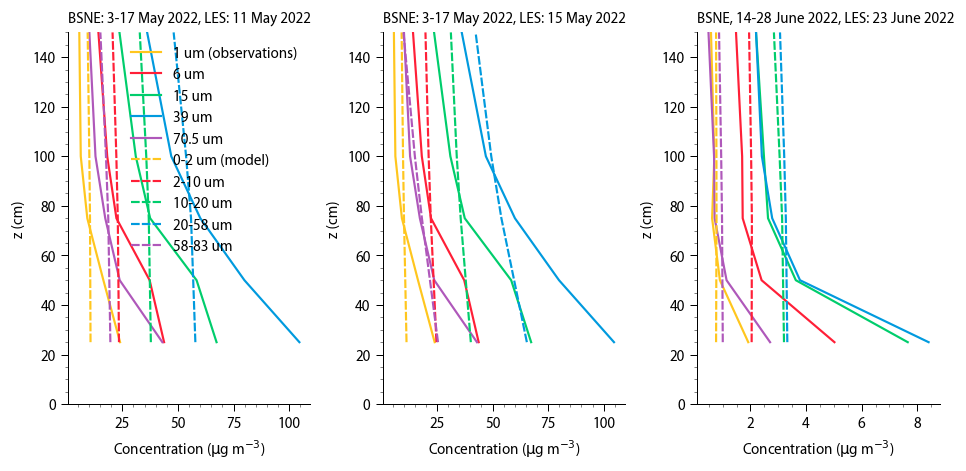

In [8]:
"""
Plot scaled profiles LES.
"""

pl.figure(figsize=(8,4), layout='tight')

pl.subplot(131)
pl.title('BSNE: 3-17 May 2022, LES: 11 May 2022', loc='left')

pl.plot(c_int_1[0], z_obs, color='C4', label='1 um (observations)')
pl.plot(c_int_1[1], z_obs, color='C0', label='6 um')
pl.plot(c_int_1[2], z_obs, color='C1', label='15 um')
pl.plot(c_int_1[3], z_obs, color='C2', label='39 um')
pl.plot(c_int_1[4], z_obs, color='C3', label='70.5 um')

pl.plot(f1[0]*ds1m_z['0-2um'],   ds1m_z.z*100, color='C4', dashes=[4,1], label='0-2 um (model)')
pl.plot(f1[1]*ds1m_z['2-10um'],  ds1m_z.z*100, color='C0', dashes=[4,1], label='2-10 um')
pl.plot(f1[2]*ds1m_z['10-20um'], ds1m_z.z*100, color='C1', dashes=[4,1], label='10-20 um')
pl.plot(f1[3]*ds1m_z['20-58um'], ds1m_z.z*100, color='C2', dashes=[4,1], label='20-58 um')
pl.plot(f1[4]*ds1m_z['58-83um'], ds1m_z.z*100, color='C3', dashes=[4,1], label='58-83 um')

pl.legend()
pl.xlabel(r'Concentration ($\mathrm{\mu}$g m$^{-3}$)')
pl.ylabel('z (cm)')
pl.ylim(0,150)

pl.subplot(132)
pl.title('BSNE: 3-17 May 2022, LES: 15 May 2022', loc='left')

pl.plot(c_int_1[0], z_obs, color='C4', label='1 um (observations)')
pl.plot(c_int_1[1], z_obs, color='C0', label='6 um')
pl.plot(c_int_1[2], z_obs, color='C1', label='15 um')
pl.plot(c_int_1[3], z_obs, color='C2', label='39 um')
pl.plot(c_int_1[4], z_obs, color='C3', label='70.5 um')

pl.plot(f2[0]*ds2m_z['0-2um'],   ds2m_z.z*100, color='C4', dashes=[4,1])
pl.plot(f2[1]*ds2m_z['2-10um'],  ds2m_z.z*100, color='C0', dashes=[4,1])
pl.plot(f2[2]*ds2m_z['10-20um'], ds2m_z.z*100, color='C1', dashes=[4,1])
pl.plot(f2[3]*ds2m_z['20-58um'], ds2m_z.z*100, color='C2', dashes=[4,1])
pl.plot(f2[4]*ds2m_z['58-83um'], ds2m_z.z*100, color='C3', dashes=[4,1])

pl.xlabel(r'Concentration ($\mathrm{\mu}$g m$^{-3}$)')
pl.ylabel('z (cm)')
pl.ylim(0,150)

pl.subplot(133)
pl.title('BSNE, 14-28 June 2022, LES: 23 June 2022', loc='left')

pl.plot(c_int_2[0], z_obs, color='C4')
pl.plot(c_int_2[1], z_obs, color='C0')
pl.plot(c_int_2[2], z_obs, color='C1')
pl.plot(c_int_2[3], z_obs, color='C2')
pl.plot(c_int_2[4], z_obs, color='C3')

pl.plot(f3[0]*ds3m_z['0-2um'],   ds3m_z.z*100, color='C4', dashes=[4,1])
pl.plot(f3[1]*ds3m_z['2-10um'],  ds3m_z.z*100, color='C0', dashes=[4,1])
pl.plot(f3[2]*ds3m_z['10-20um'], ds3m_z.z*100, color='C1', dashes=[4,1])
pl.plot(f3[3]*ds3m_z['20-58um'], ds3m_z.z*100, color='C2', dashes=[4,1])
pl.plot(f3[4]*ds3m_z['58-83um'], ds3m_z.z*100, color='C3', dashes=[4,1])

pl.xlabel(r'Concentration ($\mathrm{\mu}$g m$^{-3}$)')
pl.ylabel('z (cm)')
pl.ylim(0,150)